# LIBRARIES, DATA, AND PREPROCESSING

## Librairies

In [1]:
import sys
print(sys.executable)
!{sys.executable} -m pip install yfinance
import yfinance as yf
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)


from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, f1_score,
    accuracy_score, precision_score, recall_score, roc_auc_score
)

from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

plt.style.use("seaborn-v0_8")


c:\Users\Emile\anaconda3\python.exe


## Import Data + CSV generation

In [2]:
tickers = {
    "DJ30": "^DJI",     # Dow Jones Industrial Average
    "SNP500": "^GSPC",  # S&P 500 Index
    "CAC40": "^FCHI"    # CAC 40 Index
}
start_date = "2010-01-01"
end_date = "2025-01-01"

for name, symbol in tickers.items():
    # Download data
    data = yf.download(symbol, start=start_date, end=end_date)[["Open", "High", "Low", "Close", "Volume"]]
    
    # Rename columns with prefix, e.g. "CAC40_Open", "CAC40_Close", etc.
    data = data.rename(columns={col: f"{name}__{col}" for col in data.columns})
    
    # Save to CSV
    filename = f"{name}_data.csv"
    data.to_csv(filename, index=True)
    print(data.head(), "\n")


C:\Users\Emile\AppData\Local\Temp\ipykernel_20648\1585578420.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)[["Open", "High", "Low", "Close", "Volume"]]
[*********************100%***********************]  1 of 1 completed
C:\Users\Emile\AppData\Local\Temp\ipykernel_20648\1585578420.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)[["Open", "High", "Low", "Close", "Volume"]]


Price               Open          High           Low         Close     Volume
Ticker              ^DJI          ^DJI          ^DJI          ^DJI       ^DJI
Date                                                                         
2010-01-04  10430.690430  10604.969727  10430.690430  10583.959961  179780000
2010-01-05  10584.559570  10584.559570  10522.519531  10572.019531  188540000
2010-01-06  10564.719727  10594.990234  10546.549805  10573.679688  186040000
2010-01-07  10571.110352  10612.370117  10505.209961  10606.860352  217390000
2010-01-08  10606.400391  10619.400391  10554.330078  10618.190430  172710000 



[*********************100%***********************]  1 of 1 completed
C:\Users\Emile\AppData\Local\Temp\ipykernel_20648\1585578420.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)[["Open", "High", "Low", "Close", "Volume"]]


Price              Open         High          Low        Close      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2010-01-04  1116.560059  1133.869995  1116.560059  1132.989990  3991400000
2010-01-05  1132.660034  1136.630005  1129.660034  1136.520020  2491020000
2010-01-06  1135.709961  1139.189941  1133.949951  1137.140015  4972660000
2010-01-07  1136.270020  1142.459961  1131.319946  1141.689941  5270680000
2010-01-08  1140.520020  1145.390015  1136.219971  1144.979980  4389590000 



[*********************100%***********************]  1 of 1 completed

Price              Open         High          Low        Close     Volume
Ticker            ^FCHI        ^FCHI        ^FCHI        ^FCHI      ^FCHI
Date                                                                     
2010-01-04  3952.209961  4013.969971  3950.610107  4013.969971  113396000
2010-01-05  4012.429932  4028.340088  3993.330078  4012.909912  129518600
2010-01-06  4014.449951  4022.939941  3996.800049  4017.669922  110087000
2010-01-07  4005.959961  4032.239990  3983.899902  4024.800049  118430400
2010-01-08  4042.639893  4051.409912  4013.340088  4045.139893  131783200 



## DATA PREPROCESSING

In [3]:
df_sp = pd.read_csv("SNP500_data.csv")

# Deleting useless columns
df_sp = df_sp[~df_sp["Price"].isin(["Ticker", "Date"])].copy()

#The "price" collumn are actuallt dates
df_sp["Date"] = pd.to_datetime(df_sp["Price"])
df_sp = df_sp.drop(columns=["Price"])
df_sp = df_sp.set_index("Date")

#Make sure that every column has numerical values
for col in df_sp.columns:
    df_sp[col] = pd.to_numeric(df_sp[col], errors="coerce")

print(df_sp.head())
print(df_sp.info())

                   Open         High          Low        Close      Volume
Date                                                                      
2010-01-04  1116.560059  1133.869995  1116.560059  1132.989990  3991400000
2010-01-05  1132.660034  1136.630005  1129.660034  1136.520020  2491020000
2010-01-06  1135.709961  1139.189941  1133.949951  1137.140015  4972660000
2010-01-07  1136.270020  1142.459961  1131.319946  1141.689941  5270680000
2010-01-08  1140.520020  1145.390015  1136.219971  1144.979980  4389590000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-04 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3774 non-null   float64
 1   High    3774 non-null   float64
 2   Low     3774 non-null   float64
 3   Close   3774 non-null   float64
 4   Volume  3774 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB
None


In [4]:
#creating a copy on which we will work
data = df_sp.copy()

# returns
data["return_1d"] = data["Close"].pct_change()

# target: next day's return
data["target_return_1d"] = data["return_1d"].shift(-1)

# classification if the return is > 0 or not
data["target_direction"] = (data["target_return_1d"] > 0).astype(int)

# cleaning: remove NaN due to shifts
data = data.dropna()

# final preview
print("\nFinal dataset preview:")
display(data.head())


print("\nFinal shape:", data.shape)


Final dataset preview:


,Open,High,Low,Close,Volume,return_1d,target_return_1d,target_direction
Date,,,,,,,,
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,0.003116,0.000546,1
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,0.000546,0.004001,1
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,0.004001,0.002882,1
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,0.002882,0.001747,1
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,4255780000,0.001747,-0.009381,0



Final shape: (3772, 8)


# INDICATORS

- In this section, we will create the folloiwing indicators in order to apply them to the DJ30, SNP500 and CAC40 historical data :
    - MACD
    - RSI
    - Moving Averages
    - Volumes
    - Momentum

## MACD

What is the MACD?

The Moving Average Convergence Divergence (MACD) is a **momentum indicator**
used in technical analysis to reveal changes in the strength, direction,
and duration of a trend in a stock’s price. It’s calculated as the difference
between two Exponential Moving Averages (EMAs): a short-term one (usually 12 periods)
and a long-term one (usually 26 periods). 

    The MACD line = EMA(12) – EMA(26)
    The Signal line = EMA(9) of the MACD line
    The Histogram = MACD – Signal

When the MACD crosses above the Signal line, it may indicate **bullish momentum**;
when it crosses below, it may suggest **bearish momentum**.

In [5]:
def compute_MACD(series, fast=12, slow=26, signal=9):
    """
    Compute MACD (Moving Average Convergence Divergence) indicator.
    Returns:
        macd_line, signal_line, macd_histogram
    """
    ema_fast = series.ewm(span=fast, adjust=False).mean()
    ema_slow = series.ewm(span=slow, adjust=False).mean()

    macd_line = ema_fast - ema_slow
    signal_line = macd_line.ewm(span=signal, adjust=False).mean()
    macd_hist = macd_line - signal_line

    return macd_line, signal_line, macd_hist

#calculate MACD on close prices
data["MACD_line"], data["MACD_signal"], data["MACD_hist"] = compute_MACD(data["Close"])

#no look-ahead bias
data["MACD_line"]   = data["MACD_line"].shift(1)
data["MACD_signal"] = data["MACD_signal"].shift(1)
data["MACD_hist"]   = data["MACD_hist"].shift(1)

#clean NaN
data = data.dropna()

display(data[["Close", "MACD_line", "MACD_signal", "MACD_hist"]].head())

,Close,MACD_line,MACD_signal,MACD_hist
Date,,,,
2010-01-06,1137.140015,0.000000,0.000000,0.000000
2010-01-07,1141.689941,0.049458,0.009892,0.039567
2010-01-08,1144.979980,0.450601,0.098034,0.352568
2010-01-11,1146.979980,1.022205,0.282868,0.739337
2010-01-12,1136.219971,1.617938,0.549882,1.068056


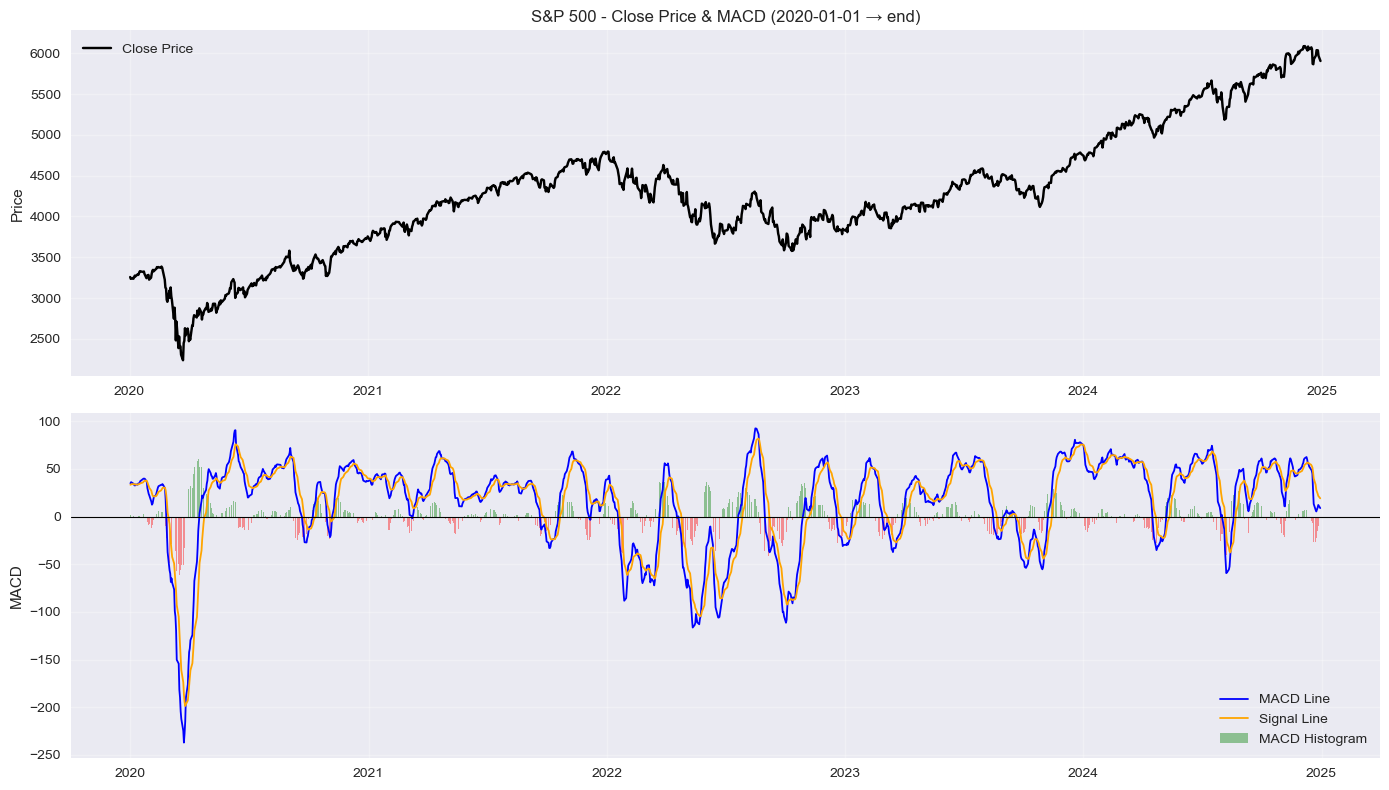

In [6]:
import matplotlib.pyplot as plt

start_plot = "2020-01-01"
data_plot = data.loc[start_plot:]

plt.figure(figsize=(14, 8))

# Plot du prix
plt.subplot(2, 1, 1)
plt.plot(data_plot.index, data_plot["Close"], label="Close Price", color="black")
plt.title(f"S&P 500 - Close Price & MACD ({start_plot} → end)")
plt.ylabel("Price")
plt.grid(alpha=0.3)
plt.legend()

# Plot du MACD
plt.subplot(2, 1, 2)
plt.plot(data_plot.index, data_plot["MACD_line"], label="MACD Line", color="blue", linewidth=1.3)
plt.plot(data_plot.index, data_plot["MACD_signal"], label="Signal Line", color="orange", linewidth=1.3)

# Histogram
plt.bar(
    data_plot.index,
    data_plot["MACD_hist"],
    label="MACD Histogram",
    color=["green" if v >= 0 else "red" for v in data_plot["MACD_hist"]],
    alpha=0.4
)

plt.axhline(0, color="black", linewidth=0.8)
plt.ylabel("MACD")
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


## RSI

The Relative Strength Index (RSI) is a momentum oscillator developed by J. Welles Wilder that measures the speed and magnitude of recent price movements to identify overbought or oversold market conditions. It oscillates between 0 and 100, typically using a 14-period window. When RSI rises above 70, it suggests that the asset may be overbought and could experience a pullback; when it falls below 30, it indicates that the asset may be oversold and due for a rebound. In trading and machine-learning contexts, RSI serves as a non-linear feature capturing momentum reversals and exhaustion in trends—helping models detect short-term shifts in market sentiment.

In [7]:
def compute_RSI(series, window=14):
    delta = series.diff()

    # Separate positive and negative changes
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    # Exponential moving averages (Wilder’s smoothing)
    avg_gain = gain.ewm(alpha=1/window, min_periods=window).mean()
    avg_loss = loss.ewm(alpha=1/window, min_periods=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [8]:
data["RSI_14"] = compute_RSI(data["Close"], window=14)

In [9]:
data["RSI_14"] = data["RSI_14"].shift(1)
#to prevent look ahead bias

#clean missing values
data = data.dropna()

display(data[["Close", "RSI_14"]].head())

,Close,RSI_14
Date,,
2010-01-28,1084.530029,32.301474
2010-01-29,1073.869995,27.969041
2010-02-01,1089.189941,25.000992
2010-02-02,1103.319946,35.581100
2010-02-03,1097.280029,43.498207


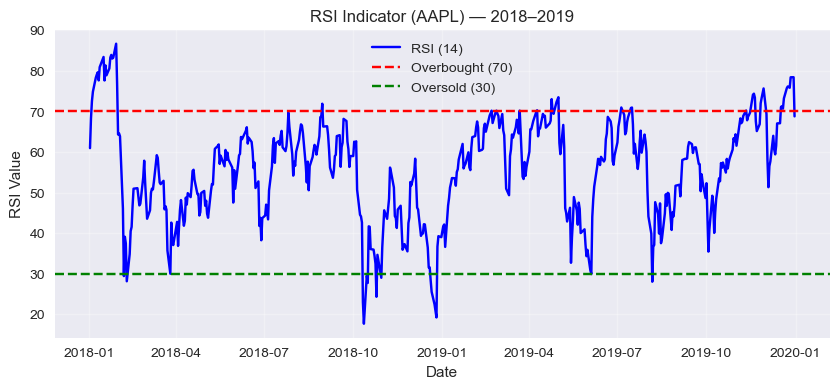

In [10]:
mask = (data.index >= "2018-01-01") & (data.index <= "2019-12-31")
subset = data.loc[mask]
plt.figure(figsize=(10, 4))
plt.plot(subset.index, subset["RSI_14"], label="RSI (14)", color="blue")
plt.axhline(70, color="red", linestyle="--", label="Overbought (70)")
plt.axhline(30, color="green", linestyle="--", label="Oversold (30)")
plt.title("RSI Indicator (AAPL) — 2018–2019")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## EMA

Moving averages smooth the price and help identify trends,the EMA applies weighting factors which decrease exponentially. The weighting for each older datum decreases exponentially, never reaching zero. Momentum measures how quickly the price changes over a period (10 or 20 days).
Positive momentum means acceleration upward, negative momentum means downward acceleration.

In [11]:
#Simple Moving Averages
data["SMA_20"] = data["Close"].rolling(window=20).mean()
data["SMA_50"] = data["Close"].rolling(window=50).mean()

#Exponential Moving Average (EMA)
data["EMA_20"] = data["Close"].ewm(span=20, adjust=False).mean()

In [12]:
#difference between price and moving averages
data["Close_minus_SMA20"] = data["Close"] - data["SMA_20"]
data["Close_minus_SMA50"] = data["Close"] - data["SMA_50"]

In [13]:
#momentum indicators
data["momentum_10d"] = data["Close"].pct_change(10)
data["momentum_20d"] = data["Close"].pct_change(20)

In [14]:
#no look ahead bias
cols_to_shift = [
    "SMA_20", "SMA_50", "EMA_20",
    "Close_minus_SMA20", "Close_minus_SMA50",
    "momentum_10d", "momentum_20d"
]

data[cols_to_shift] = data[cols_to_shift].shift(1)

#clean NaN
data = data.dropna()

In [15]:
display(data[[
    "Close", "SMA_20", "SMA_50", "EMA_20",
    "Close_minus_SMA20", "momentum_10d", "momentum_20d"
]].head())

,Close,SMA_20,SMA_50,EMA_20,Close_minus_SMA20,momentum_10d,momentum_20d
Date,,,,,,,
2010-04-12,1196.479980,1171.303986,1129.355989,1169.388175,23.066010,0.024568,0.038366
2010-04-13,1197.300049,1173.628485,1131.594988,1171.968347,22.851495,0.025622,0.040426
2010-04-14,1210.650024,1175.967987,1134.063589,1174.380890,21.332062,0.020525,0.040669
2010-04-15,1211.670044,1178.527490,1136.492791,1177.835093,32.122534,0.031860,0.044150
2010-04-16,1192.130005,1180.800494,1138.659792,1181.057469,30.869550,0.036120,0.038981


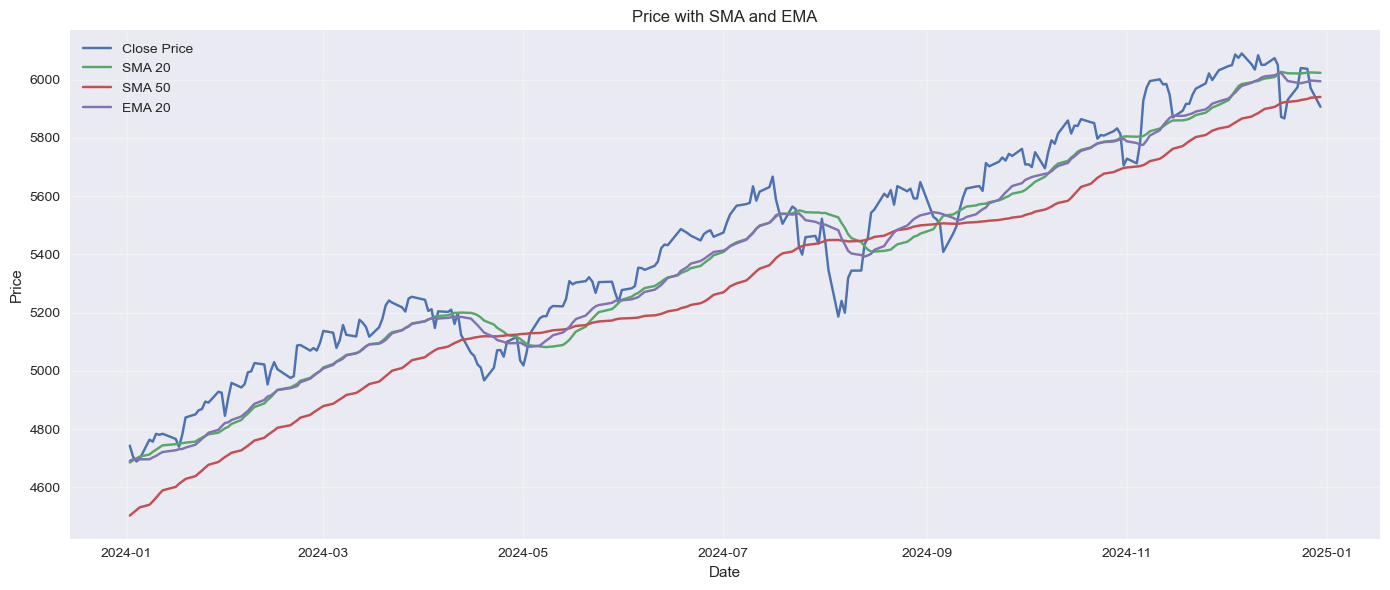

In [16]:
start_plot = "2024-01-01"
plot_data = data.loc[start_plot:]

plt.figure(figsize=(14, 6))

plt.plot(plot_data.index, plot_data["Close"], label="Close Price")
plt.plot(plot_data.index, plot_data["SMA_20"], label="SMA 20")
plt.plot(plot_data.index, plot_data["SMA_50"], label="SMA 50")
plt.plot(plot_data.index, plot_data["EMA_20"], label="EMA 20")

plt.title("Price with SMA and EMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

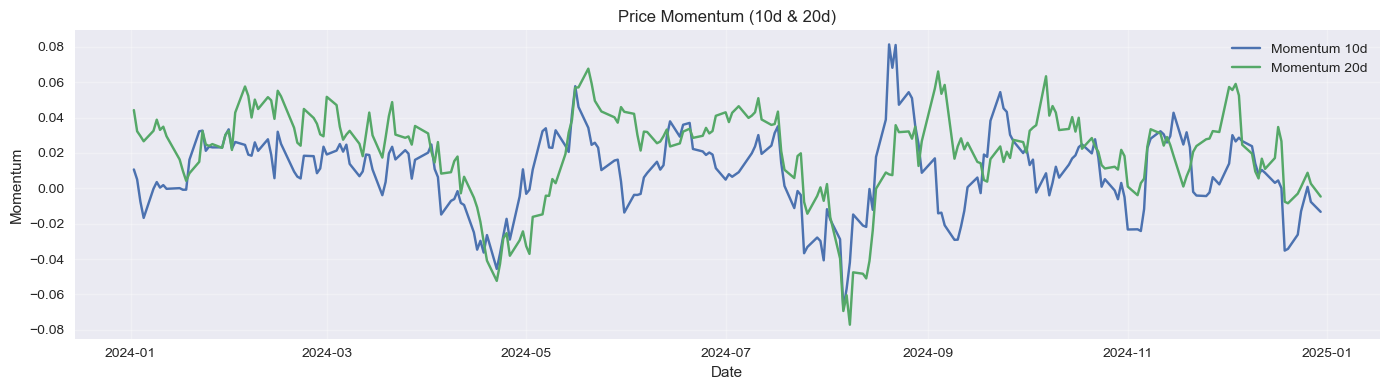

In [17]:
plt.figure(figsize=(14, 4))

plt.plot(plot_data.index, plot_data["momentum_10d"], label="Momentum 10d")
plt.plot(plot_data.index, plot_data["momentum_20d"], label="Momentum 20d")

plt.title("Price Momentum (10d & 20d)")
plt.xlabel("Date")
plt.ylabel("Momentum")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# Time-aware split
# Train: 2015–2019
# Validation: 2020–2022
# Test: 2023–2024
train_df = data.loc["2015-01-01":"2019-12-31"].copy()
val_df   = data.loc["2020-01-01":"2022-12-31"].copy()
test_df  = data.loc["2023-01-01":"2023-07-01"].copy()

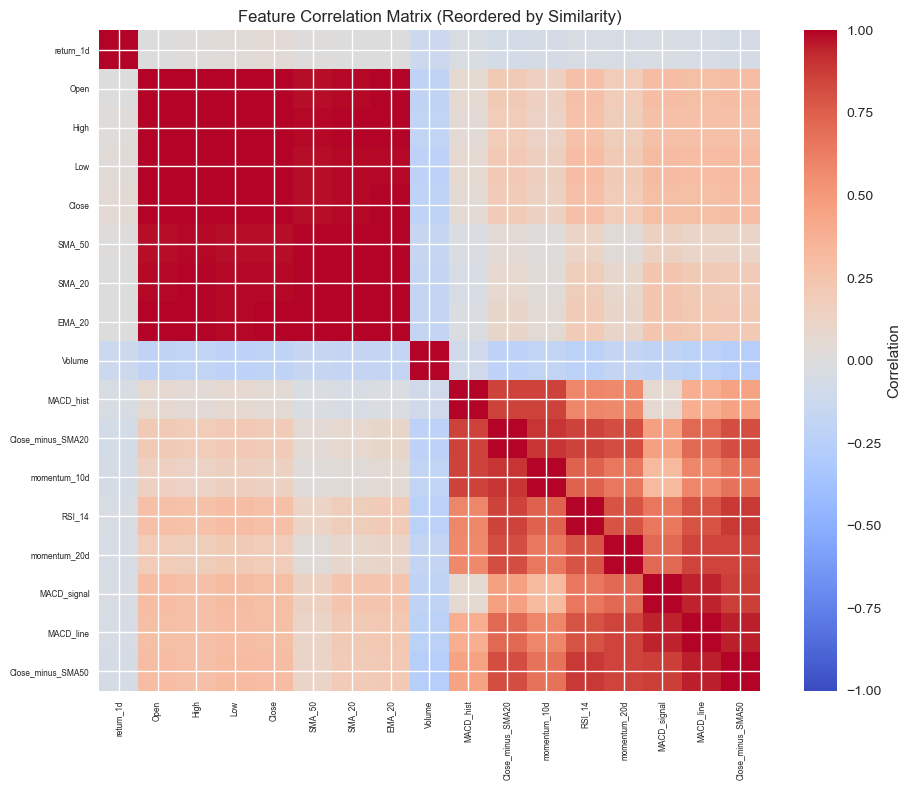

In [19]:
# Correlation matrix (train set)
exclude = {"target_direction", "target_return_1d"}
corr_features = [
    c for c in train_df.columns
    if c not in exclude and pd.api.types.is_numeric_dtype(train_df[c])
]

corr = train_df[corr_features].corr()

# Hierarchical clustering on correlations
# Distance based on absolute correlation
dist = 1 - np.abs(corr)

# Convert to condensed distance matrix
dist_condensed = squareform(dist.values)

# Linkage
Z = linkage(dist_condensed, method="average")

# Order features
order = leaves_list(Z)
ordered_features = [corr_features[i] for i in order]

# Reorder correlation matrix
corr_ordered = corr.loc[ordered_features, ordered_features]

# Plot
plt.figure(figsize=(10, 8))
plt.imshow(corr_ordered, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Correlation")
plt.title("Feature Correlation Matrix (Reordered by Similarity)")
plt.xticks(range(len(ordered_features)), ordered_features, rotation=90, fontsize=6)
plt.yticks(range(len(ordered_features)), ordered_features, fontsize=6)
plt.tight_layout()
plt.show()


## Modeling — Baseline Classification (Logistic Regression)

This section builds an **interpretable baseline** classifier to predict the **next-day direction** of returns:
- `target_direction = 1` if next-day return is positive, else `0`.

A **time-aware split** is used (no shuffling) to mimic an out-of-sample evaluation.
All preprocessing is handled through a **Pipeline** to avoid leakage (scaling is fitted on the train set only).


Split sizes: {'train': 1258, 'val': 756, 'test': 124}
X shapes: (1258, 17) (756, 17) (124, 17)
Train class balance: {1: 0.5373608903020668, 0: 0.4626391096979332}

[Logistic Regression — Validation]
Train time: 0.0357s | Inference time: 0.0014s
Accuracy: 0.5198 | Precision: 0.5223 | Recall: 0.9468 | F1: 0.6733

Classification report (validation):
              precision    recall  f1-score   support

           0       0.47      0.05      0.09       361
           1       0.52      0.95      0.67       395

    accuracy                           0.52       756
   macro avg       0.50      0.50      0.38       756
weighted avg       0.50      0.52      0.40       756



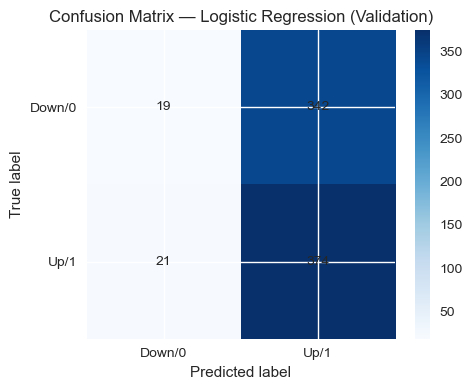


Top 15 features by |coefficient| (standardized space):


,feature,coef,abs_coef
1,High,-0.393554,0.393554
13,Close_minus_SMA20,-0.212895,0.212895
8,MACD_hist,0.192069,0.192069
3,Close,0.172855,0.172855
2,Low,0.162055,0.162055
10,SMA_20,0.112255,0.112255
15,momentum_10d,-0.112171,0.112171
11,SMA_50,0.107706,0.107706
14,Close_minus_SMA50,-0.107151,0.107151
9,RSI_14,0.093526,0.093526


In [20]:
#Data and target checks
if "data" not in globals():
    raise NameError("Expected a dataframe named `data` (created earlier in the notebook).")

if "target_direction" not in data.columns:
    raise KeyError("Column `target_direction` not found in `data`. It must be created before modeling.")

# Ensure time index is sorted
data = data.sort_index()

# Fallback if a dataset starts later (keeps the same logic: most data for training)
if len(train_df) == 0 or len(val_df) == 0 or len(test_df) == 0:
    n = len(data)
    train_end = int(n * 0.80)
    val_end = int(n * 0.90)
    train_df = data.iloc[:train_end].copy()
    val_df   = data.iloc[train_end:val_end].copy()
    test_df  = data.iloc[val_end:].copy()

print("Split sizes:", {"train": len(train_df), "val": len(val_df), "test": len(test_df)})


# Feature matrix (X) and target vector (y)
# Exclude targets (and keep all remaining numeric columns as features).
exclude_cols = {"target_direction", "target_return_1d"}

feature_cols = [
    c for c in train_df.columns
    if c not in exclude_cols and pd.api.types.is_numeric_dtype(train_df[c])
]

# Basic sanity check: all features must exist in all splits
missing_in_val = [c for c in feature_cols if c not in val_df.columns]
missing_in_test = [c for c in feature_cols if c not in test_df.columns]
if missing_in_val or missing_in_test:
    raise KeyError(
        f"Some features are missing in validation/test sets. "
        f"Missing in val: {missing_in_val[:10]} | Missing in test: {missing_in_test[:10]}"
    )

X_train = train_df[feature_cols]
y_train = train_df["target_direction"].astype(int)

X_val = val_df[feature_cols]
y_val = val_df["target_direction"].astype(int)

X_test = test_df[feature_cols]
y_test = test_df["target_direction"].astype(int)

print("X shapes:", X_train.shape, X_val.shape, X_test.shape)
print("Train class balance:", y_train.value_counts(normalize=True).to_dict())


# Pipeline (scaling + classifier)
logreg_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        solver="lbfgs",
        max_iter=1000,
        random_state=42
    ))
])


# Fit on train, evaluate on validation
t0 = time.perf_counter()
logreg_pipe.fit(X_train, y_train)
train_time = time.perf_counter() - t0

t1 = time.perf_counter()
y_val_pred = logreg_pipe.predict(X_val)
infer_time = time.perf_counter() - t1

acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred, zero_division=0)
rec = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)

print("\n[Logistic Regression — Validation]")
print(f"Train time: {train_time:.4f}s | Inference time: {infer_time:.4f}s")
print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")
print("\nClassification report (validation):")
print(classification_report(y_val, y_val_pred, zero_division=0))


# 5) Confusion matrix (validation)
cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(5, 4))
plt.imshow(cm, cmap="Blues", interpolation="nearest")
plt.title("Confusion Matrix — Logistic Regression (Validation)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks([0, 1], ["Down/0", "Up/1"])
plt.yticks([0, 1], ["Down/0", "Up/1"])

for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha="center", va="center")

plt.colorbar()
plt.tight_layout()
plt.show()


# 6) Coefficients (feature influence in standardized space)
coefs = logreg_pipe.named_steps["model"].coef_.ravel()
coef_df = pd.DataFrame({"feature": feature_cols, "coef": coefs, "abs_coef": np.abs(coefs)})
coef_df = coef_df.sort_values("abs_coef", ascending=False)

print("\nTop 15 features by |coefficient| (standardized space):")
display(coef_df.head(15))


# Classification — Decision Tree (Non-linear baseline)

Shapes: (1258, 17) (756, 17)
Train class balance: {1: 0.5373608903020668, 0: 0.4626391096979332}

[Decision Tree — Default (Validation)]
Train time: 0.0629s | Inference time: 0.0011s
Accuracy: 0.5066 | Precision: 0.5274 | Recall: 0.5367 | F1: 0.5320

Classification report:
               precision    recall  f1-score   support

           0       0.48      0.47      0.48       361
           1       0.53      0.54      0.53       395

    accuracy                           0.51       756
   macro avg       0.51      0.51      0.51       756
weighted avg       0.51      0.51      0.51       756



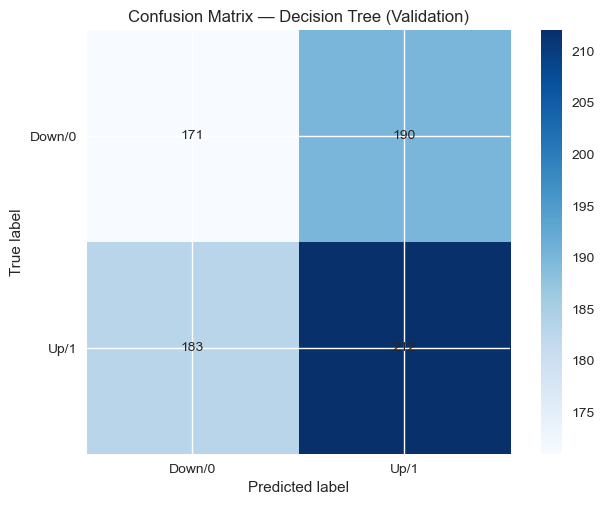

,max_depth,train_acc,val_acc,train_f1,val_f1
0,1,0.550874,0.503968,0.696400,0.550898
1,2,0.554054,0.507937,0.699196,0.618852
2,3,0.559618,0.507937,0.705005,0.621951
3,4,0.562003,0.509259,0.706446,0.622584
4,5,0.596979,0.510582,0.672692,0.619342
5,7,0.638315,0.511905,0.701639,0.599349
6,10,0.714626,0.503968,0.755283,0.511082
7,15,0.833068,0.506614,0.862385,0.524841
8,None,1.000000,0.506614,1.000000,0.531995


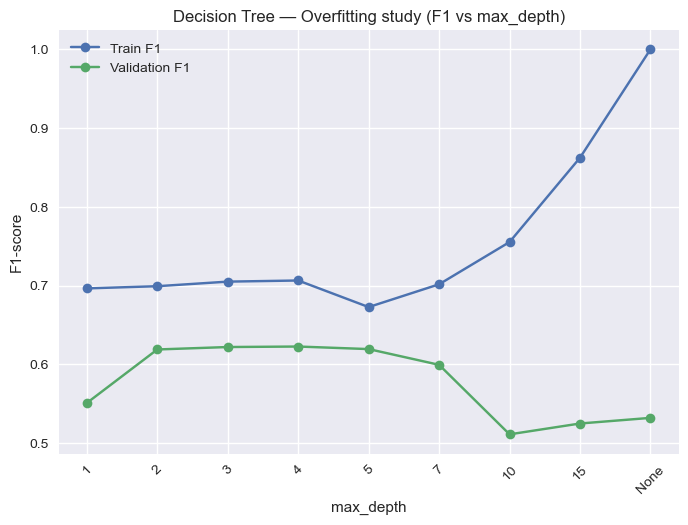


Best depth by validation F1:
max_depth           4
train_acc    0.562003
val_acc      0.509259
train_f1     0.706446
val_f1       0.622584
Name: 3, dtype: object


In [21]:
# Reuse the exact same split + features as Logistic Regression
# Expected: DF dataframe + feature_cols list + target column name TARGET

if "DF" not in globals():
    if "df_model" in globals():
        DF = df_model.copy()
    elif "data" in globals():
        DF = data.copy()
    else:
        raise NameError("Could not find modeling dataframe (`df_model` or `data`).")

TARGET = "target_direction"
if TARGET not in DF.columns:
    raise KeyError(f"Target column `{TARGET}` not found.")

if "feature_cols" not in globals():
    exclude = {TARGET, "target_return_1d"}
    feature_cols = [c for c in DF.columns if c not in exclude and pd.api.types.is_numeric_dtype(DF[c])]

if not all(name in globals() for name in ["train_df", "val_df", "test_df"]):
    n = len(DF)
    train_end = int(n * 0.80)
    val_end   = int(n * 0.90)
    train_df = DF.iloc[:train_end].copy()
    val_df   = DF.iloc[train_end:val_end].copy()
    test_df  = DF.iloc[val_end:].copy()

X_train = train_df[feature_cols]
y_train = train_df[TARGET].astype(int)

X_val = val_df[feature_cols]
y_val = val_df[TARGET].astype(int)

print("Shapes:", X_train.shape, X_val.shape)
print("Train class balance:", y_train.value_counts(normalize=True).to_dict())



# Default Decision Tree (baseline)
dt_default = DecisionTreeClassifier(random_state=42)

t0 = time.perf_counter()
dt_default.fit(X_train, y_train)
train_time = time.perf_counter() - t0

t1 = time.perf_counter()
y_val_pred = dt_default.predict(X_val)
infer_time = time.perf_counter() - t1

acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred, zero_division=0)
rec = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)

print("\n[Decision Tree — Default (Validation)]")
print(f"Train time: {train_time:.4f}s | Inference time: {infer_time:.4f}s")
print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")
print("\nClassification report:\n", classification_report(y_val, y_val_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure()
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix — Decision Tree (Validation)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks([0, 1], ["Down/0", "Up/1"])
plt.yticks([0, 1], ["Down/0", "Up/1"])
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha="center", va="center")
plt.colorbar()
plt.show()


# Overfitting study: max_depth sweep
depths = [1, 2, 3, 4, 5, 7, 10, 15, None]
rows = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)

    y_tr = model.predict(X_train)
    y_va = model.predict(X_val)

    rows.append({
        "max_depth": str(d),
        "train_acc": accuracy_score(y_train, y_tr),
        "val_acc": accuracy_score(y_val, y_va),
        "train_f1": f1_score(y_train, y_tr, zero_division=0),
        "val_f1": f1_score(y_val, y_va, zero_division=0),
    })

results_dt = pd.DataFrame(rows)
display(results_dt)

# Plot train vs validation
plt.figure()
plt.plot(results_dt["max_depth"], results_dt["train_f1"], marker="o", label="Train F1")
plt.plot(results_dt["max_depth"], results_dt["val_f1"], marker="o", label="Validation F1")
plt.title("Decision Tree — Overfitting study (F1 vs max_depth)")
plt.xlabel("max_depth")
plt.ylabel("F1-score")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Choose the best depth based on validation F1
best_row = results_dt.loc[results_dt["val_f1"].idxmax()]
print("\nBest depth by validation F1:")
print(best_row)


# Classification — Random Forest (Ensemble Model)

Shapes: (1258, 17) (756, 17)
Train class balance: {1: 0.5373608903020668, 0: 0.4626391096979332}

[Random Forest — Baseline (Validation)]
Train time: 0.6409s | Inference time: 0.0445s
Accuracy: 0.5013 | Precision: 0.5180 | Recall: 0.6557 | F1: 0.5788

Classification report:
               precision    recall  f1-score   support

           0       0.47      0.33      0.39       361
           1       0.52      0.66      0.58       395

    accuracy                           0.50       756
   macro avg       0.49      0.49      0.48       756
weighted avg       0.49      0.50      0.49       756



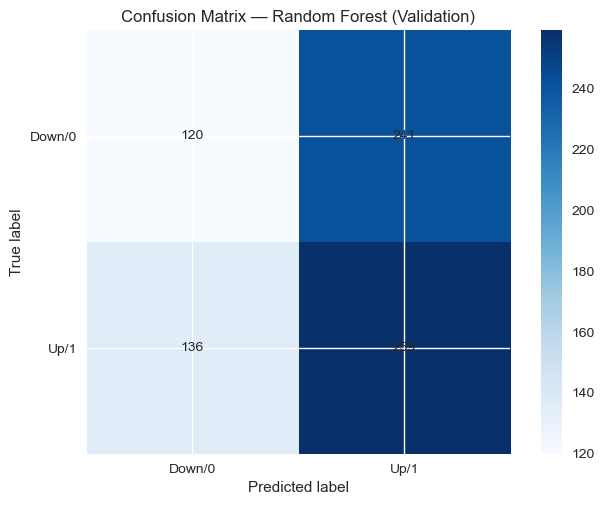


Top 10 configurations by validation F1:


,n_estimators,max_depth,min_samples_leaf,val_accuracy,val_precision,val_recall,val_f1
2,200,3,20,0.519841,0.521448,0.984810,0.681858
5,200,5,20,0.519841,0.521680,0.974684,0.679612
14,500,3,20,0.517196,0.520380,0.969620,0.677277
23,500,None,20,0.517196,0.520492,0.964557,0.676131
17,500,5,20,0.515873,0.519728,0.967089,0.676106
20,500,10,20,0.514550,0.519284,0.954430,0.672614
11,200,None,20,0.507937,0.515689,0.956962,0.670213
0,200,3,1,0.526455,0.526929,0.916456,0.669131
8,200,10,20,0.509259,0.516575,0.946835,0.668454
1,200,3,5,0.518519,0.522238,0.921519,0.666667



Best configuration (by validation F1): {'n_estimators': 200, 'max_depth': '3', 'min_samples_leaf': 20, 'val_accuracy': 0.5198412698412699, 'val_precision': 0.5214477211796247, 'val_recall': 0.9848101265822785, 'val_f1': 0.6818580192813323}

Best RF validation F1 (retrained): 0.6819

Top 20 features by Random Forest importance:


,feature,importance
1,High,0.086988
11,SMA_50,0.083884
14,Close_minus_SMA50,0.080474
0,Open,0.069973
5,return_1d,0.066458
2,Low,0.063164
4,Volume,0.059293
12,EMA_20,0.059022
3,Close,0.058609
9,RSI_14,0.058437


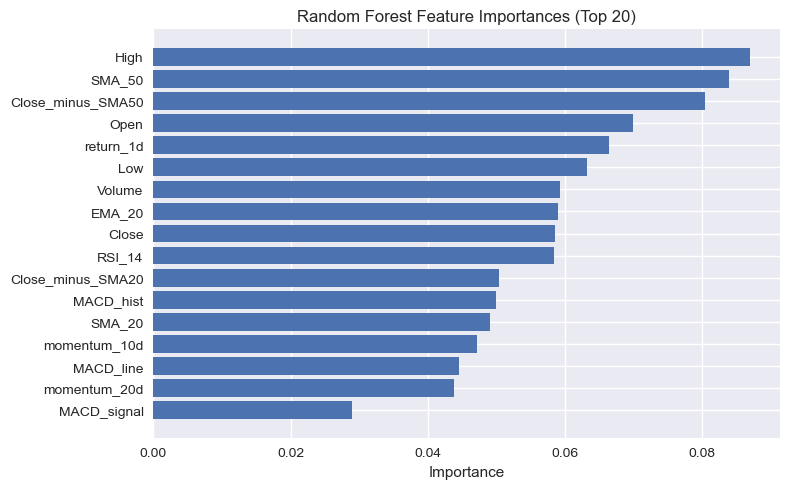

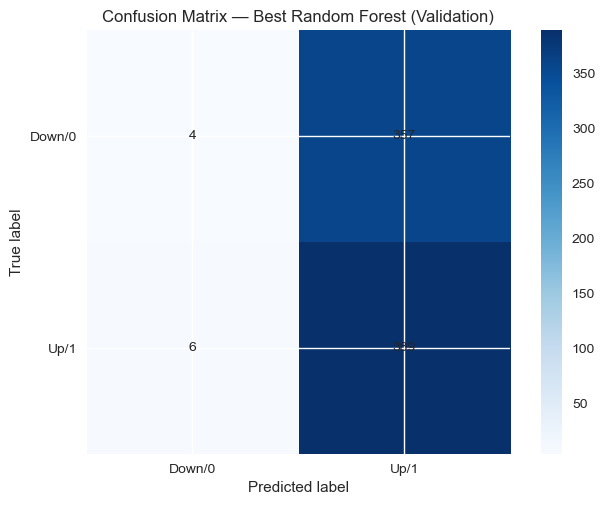

In [22]:
#Reuse the same data objects as previous sections
if "DF" not in globals():
    if "df_model" in globals():
        DF = df_model.copy()
    elif "data" in globals():
        DF = data.copy()
    else:
        raise NameError("Could not find modeling dataframe (`df_model` or `data`).")

TARGET = "target_direction"
if TARGET not in DF.columns:
    raise KeyError(f"Target column `{TARGET}` not found.")

if "feature_cols" not in globals():
    exclude = {TARGET, "target_return_1d"}
    feature_cols = [c for c in DF.columns if c not in exclude and pd.api.types.is_numeric_dtype(DF[c])]

if not all(name in globals() for name in ["train_df", "val_df", "test_df"]):
    # Default chronological split if not already created
    n = len(DF)
    train_end = int(n * 0.80)
    val_end   = int(n * 0.90)
    train_df = DF.iloc[:train_end].copy()
    val_df   = DF.iloc[train_end:val_end].copy()
    test_df  = DF.iloc[val_end:].copy()

X_train = train_df[feature_cols]
y_train = train_df[TARGET].astype(int)

X_val = val_df[feature_cols]
y_val = val_df[TARGET].astype(int)

print("Shapes:", X_train.shape, X_val.shape)
print("Train class balance:", y_train.value_counts(normalize=True).to_dict())


# 1) Baseline Random Forest
rf_base = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

t0 = time.perf_counter()
rf_base.fit(X_train, y_train)
train_time = time.perf_counter() - t0

t1 = time.perf_counter()
y_val_pred = rf_base.predict(X_val)
infer_time = time.perf_counter() - t1

acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred, zero_division=0)
rec = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)

print("\n[Random Forest — Baseline (Validation)]")
print(f"Train time: {train_time:.4f}s | Inference time: {infer_time:.4f}s")
print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")
print("\nClassification report:\n", classification_report(y_val, y_val_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure()
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix — Random Forest (Validation)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks([0, 1], ["Down/0", "Up/1"])
plt.yticks([0, 1], ["Down/0", "Up/1"])
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha="center", va="center")
plt.colorbar()
plt.show()


# Funnel approach: small hyperparameter sweep
grid = {
    "n_estimators": [200, 500],
    "max_depth": [3, 5, 10, None],
    "min_samples_leaf": [1, 5, 20]
}

rows = []
for n_est in grid["n_estimators"]:
    for depth in grid["max_depth"]:
        for leaf in grid["min_samples_leaf"]:
            model = RandomForestClassifier(
                n_estimators=n_est,
                max_depth=depth,
                min_samples_leaf=leaf,
                random_state=42,
                n_jobs=-1
            )
            model.fit(X_train, y_train)
            pred_val = model.predict(X_val)

            rows.append({
                "n_estimators": n_est,
                "max_depth": str(depth),
                "min_samples_leaf": leaf,
                "val_accuracy": accuracy_score(y_val, pred_val),
                "val_precision": precision_score(y_val, pred_val, zero_division=0),
                "val_recall": recall_score(y_val, pred_val, zero_division=0),
                "val_f1": f1_score(y_val, pred_val, zero_division=0)
            })

rf_results = pd.DataFrame(rows).sort_values("val_f1", ascending=False)
print("\nTop 10 configurations by validation F1:")
display(rf_results.head(10))

best_cfg = rf_results.iloc[0].to_dict()
print("\nBest configuration (by validation F1):", best_cfg)

#Retrain the best RF and analyze feature importance
best_rf = RandomForestClassifier(
    n_estimators=int(best_cfg["n_estimators"]),
    max_depth=None if best_cfg["max_depth"] == "None" else int(best_cfg["max_depth"]),
    min_samples_leaf=int(best_cfg["min_samples_leaf"]),
    random_state=42,
    n_jobs=-1
)
best_rf.fit(X_train, y_train)

best_pred_val = best_rf.predict(X_val)
best_f1 = f1_score(y_val, best_pred_val, zero_division=0)
print(f"\nBest RF validation F1 (retrained): {best_f1:.4f}")

# Feature importances
imp = pd.DataFrame({
    "feature": feature_cols,
    "importance": best_rf.feature_importances_
}).sort_values("importance", ascending=False)

print("\nTop 20 features by Random Forest importance:")
display(imp.head(20))


#plot top 20 importances
topk = 20
plt.figure(figsize=(8, 5))
plt.barh(imp.head(topk)["feature"][::-1], imp.head(topk)["importance"][::-1])
plt.title("Random Forest Feature Importances (Top 20)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


# Confusion matrix for best RF on validation
cm_best = confusion_matrix(y_val, best_pred_val)
plt.figure()
plt.imshow(cm_best, cmap="Blues")
plt.title("Confusion Matrix — Best Random Forest (Validation)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks([0, 1], ["Down/0", "Up/1"])
plt.yticks([0, 1], ["Down/0", "Up/1"])
for (i, j), v in np.ndenumerate(cm_best):
    plt.text(j, i, str(v), ha="center", va="center")
plt.colorbar()
plt.show()


# Classification — Gradient Boosting (Boosted Trees)

Shapes: (1258, 17) (756, 17)
Train class balance: {1: 0.5373608903020668, 0: 0.4626391096979332}

[Gradient Boosting — Baseline (Validation)]
Train time: 3.3764s | Inference time: 0.0023s
Accuracy: 0.5304 | Precision: 0.5407 | Recall: 0.6734 | F1: 0.5998 | ROC-AUC: 0.5172

Classification report:
               precision    recall  f1-score   support

           0       0.51      0.37      0.43       361
           1       0.54      0.67      0.60       395

    accuracy                           0.53       756
   macro avg       0.53      0.52      0.52       756
weighted avg       0.53      0.53      0.52       756



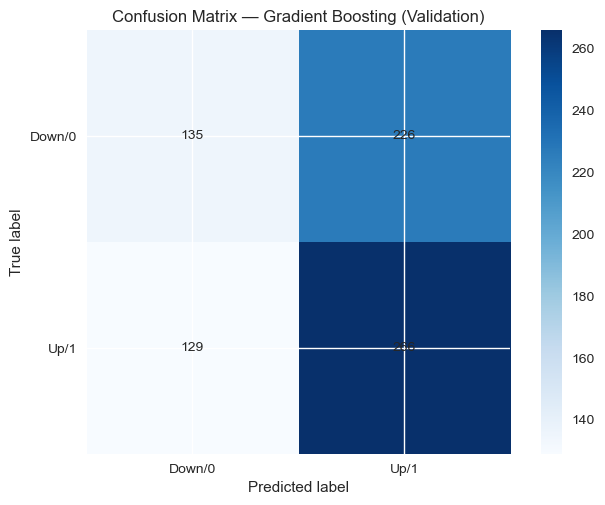

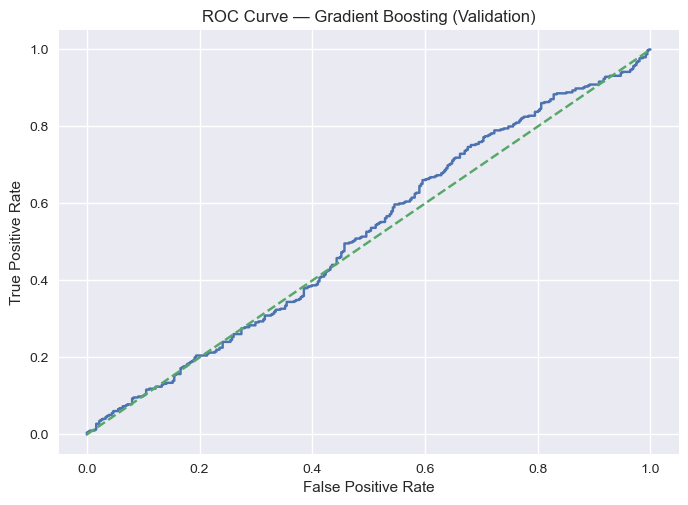


Top 10 configurations by validation F1 (then ROC-AUC):


,n_estimators,learning_rate,max_depth,val_accuracy,val_precision,val_recall,val_f1,val_roc_auc
2,200,0.01,4,0.527778,0.531353,0.815190,0.643357,0.511515
1,200,0.01,3,0.530423,0.533784,0.800000,0.640324,0.510674
11,500,0.01,4,0.531746,0.536028,0.772152,0.632780,0.516231
5,200,0.05,4,0.529101,0.536862,0.718987,0.614719,0.534324
10,500,0.01,3,0.527778,0.536822,0.701266,0.608123,0.514944
4,200,0.05,3,0.530423,0.540650,0.673418,0.599775,0.517168
8,200,0.10,4,0.523810,0.535354,0.670886,0.595506,0.509275
0,200,0.01,2,0.521164,0.533469,0.665823,0.592342,0.507925
6,200,0.10,2,0.514550,0.527778,0.673418,0.591769,0.517823
12,500,0.05,2,0.523810,0.536383,0.653165,0.589041,0.518851



Best configuration: {'n_estimators': 200.0, 'learning_rate': 0.01, 'max_depth': 4.0, 'val_accuracy': 0.5277777777777778, 'val_precision': 0.5313531353135313, 'val_recall': 0.8151898734177215, 'val_f1': 0.6433566433566434, 'val_roc_auc': 0.5115151302640345}

Best GB — Validation F1: 0.6434 | ROC-AUC: 0.5115


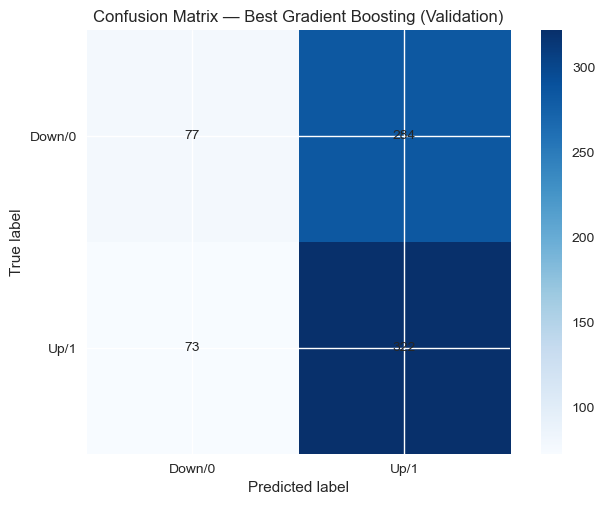

In [23]:
# Gradient Boosting — Classification

#Reuse the same objects: DF, train_df/val_df/test_df, feature_cols
if "DF" not in globals():
    if "df_model" in globals():
        DF = df_model.copy()
    elif "data" in globals():
        DF = data.copy()
    else:
        raise NameError("Could not find modeling dataframe (`df_model` or `data`).")

TARGET = "target_direction"
if TARGET not in DF.columns:
    raise KeyError(f"Target column `{TARGET}` not found.")

if "feature_cols" not in globals():
    exclude = {TARGET, "target_return_1d"}
    feature_cols = [c for c in DF.columns if c not in exclude and pd.api.types.is_numeric_dtype(DF[c])]

if not all(name in globals() for name in ["train_df", "val_df", "test_df"]):
    n = len(DF)
    train_end = int(n * 0.80)
    val_end   = int(n * 0.90)
    train_df = DF.iloc[:train_end].copy()
    val_df   = DF.iloc[train_end:val_end].copy()
    test_df  = DF.iloc[val_end:].copy()

X_train = train_df[feature_cols]
y_train = train_df[TARGET].astype(int)

X_val = val_df[feature_cols]
y_val = val_df[TARGET].astype(int)

print("Shapes:", X_train.shape, X_val.shape)
print("Train class balance:", y_train.value_counts(normalize=True).to_dict())

# Baseline Gradient Boosting
gb_base = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

t0 = time.perf_counter()
gb_base.fit(X_train, y_train)
train_time = time.perf_counter() - t0

t1 = time.perf_counter()
y_val_pred = gb_base.predict(X_val)
infer_time = time.perf_counter() - t1

# Probabilities for ROC-AUC
y_val_proba = gb_base.predict_proba(X_val)[:, 1]

acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred, zero_division=0)
rec = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
auc = roc_auc_score(y_val, y_val_proba)

print("\n[Gradient Boosting — Baseline (Validation)]")
print(f"Train time: {train_time:.4f}s | Inference time: {infer_time:.4f}s")
print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f} | ROC-AUC: {auc:.4f}")
print("\nClassification report:\n", classification_report(y_val, y_val_pred, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure()
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix — Gradient Boosting (Validation)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks([0, 1], ["Down/0", "Up/1"])
plt.yticks([0, 1], ["Down/0", "Up/1"])
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha="center", va="center")
plt.colorbar()
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curve — Gradient Boosting (Validation)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Funnel approach: small hyperparameter sweep
grid = {
    "n_estimators": [200, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 4]
}

rows = []
for n_est in grid["n_estimators"]:
    for lr in grid["learning_rate"]:
        for md in grid["max_depth"]:
            model = GradientBoostingClassifier(
                n_estimators=n_est,
                learning_rate=lr,
                max_depth=md,
                random_state=42
            )
            model.fit(X_train, y_train)

            pred = model.predict(X_val)
            proba = model.predict_proba(X_val)[:, 1]

            rows.append({
                "n_estimators": n_est,
                "learning_rate": lr,
                "max_depth": md,
                "val_accuracy": accuracy_score(y_val, pred),
                "val_precision": precision_score(y_val, pred, zero_division=0),
                "val_recall": recall_score(y_val, pred, zero_division=0),
                "val_f1": f1_score(y_val, pred, zero_division=0),
                "val_roc_auc": roc_auc_score(y_val, proba)
            })

gb_results = pd.DataFrame(rows).sort_values(["val_f1", "val_roc_auc"], ascending=False)
print("\nTop 10 configurations by validation F1 (then ROC-AUC):")
display(gb_results.head(10))

best_cfg = gb_results.iloc[0].to_dict()
print("\nBest configuration:", best_cfg)


# Retrain best model and re-evaluate on validation
best_gb = GradientBoostingClassifier(
    n_estimators=int(best_cfg["n_estimators"]),
    learning_rate=float(best_cfg["learning_rate"]),
    max_depth=int(best_cfg["max_depth"]),
    random_state=42
)
best_gb.fit(X_train, y_train)

best_pred = best_gb.predict(X_val)
best_proba = best_gb.predict_proba(X_val)[:, 1]

best_f1 = f1_score(y_val, best_pred, zero_division=0)
best_auc = roc_auc_score(y_val, best_proba)
print(f"\nBest GB — Validation F1: {best_f1:.4f} | ROC-AUC: {best_auc:.4f}")

cm_best = confusion_matrix(y_val, best_pred)
plt.figure()
plt.imshow(cm_best, cmap="Blues")
plt.title("Confusion Matrix — Best Gradient Boosting (Validation)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks([0, 1], ["Down/0", "Up/1"])
plt.yticks([0, 1], ["Down/0", "Up/1"])
for (i, j), v in np.ndenumerate(cm_best):
    plt.text(j, i, str(v), ha="center", va="center")
plt.colorbar()
plt.show()


# Final Model Tuning (Funnel) + Single Test Evaluation

At this stage, model families have been compared on the validation set.
We now refine hyperparameters for the best candidates using a controlled search.

- training is performed on the train set only,
- hyperparameter selection is based on validation performance only,
- the test set is used exactly once for the final evaluation.


Best RF params: {'max_depth': 3, 'min_samples_leaf': 20, 'n_estimators': 1000}
Best RF validation F1: 0.68416447944007
Best GB params: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Best GB validation F1: 0.6433566433566434

Selected final model: Random Forest

[FINAL TEST RESULTS]
Accuracy: 0.5565 | Precision: 0.5545 | Recall: 0.9104 | F1: 0.6893
ROC-AUC: 0.5022

Classification report (test):
              precision    recall  f1-score   support

           0       0.57      0.14      0.23        57
           1       0.55      0.91      0.69        67

    accuracy                           0.56       124
   macro avg       0.56      0.53      0.46       124
weighted avg       0.56      0.56      0.48       124



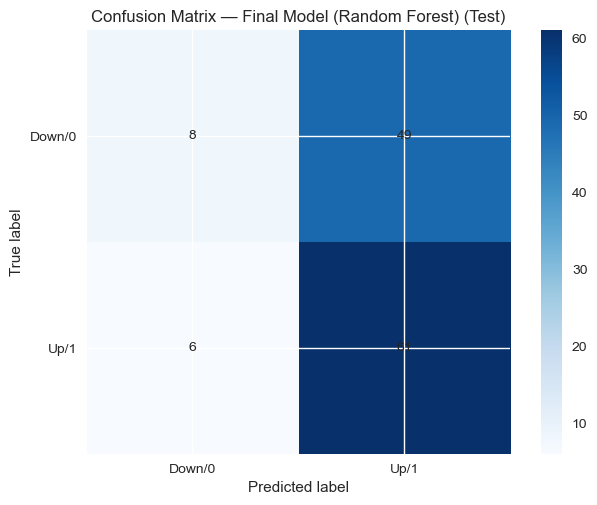

In [24]:
# Final tuning: GridSearch on top candidates (RF + GB)

# Safety: expected variables
TARGET = "target_direction"

if "train_df" not in globals() or "val_df" not in globals() or "test_df" not in globals():
    raise NameError("Expected `train_df`, `val_df`, `test_df` from the time-aware split.")

if "feature_cols" not in globals():
    raise NameError("Expected `feature_cols` list.")

X_train = train_df[feature_cols]
y_train = train_df[TARGET].astype(int)

X_val = val_df[feature_cols]
y_val = val_df[TARGET].astype(int)

X_test = test_df[feature_cols]
y_test = test_df[TARGET].astype(int)

# Combine train+val for PredefinedSplit (train folds=-1, val fold=0)
X_tv = pd.concat([X_train, X_val], axis=0)
y_tv = pd.concat([y_train, y_val], axis=0)

test_fold = np.r_[
    -1 * np.ones(len(X_train), dtype=int),
     0 * np.ones(len(X_val), dtype=int)
]
ps = PredefinedSplit(test_fold=test_fold)


# Random Forest tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_param_grid = {
    "n_estimators": [300, 600, 1000],
    "max_depth": [3, 5, 10, None],
    "min_samples_leaf": [1, 5, 20]
}

rf_gs = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring="f1",
    cv=ps,
    n_jobs=-1,
    verbose=0
)
rf_gs.fit(X_tv, y_tv)

print("Best RF params:", rf_gs.best_params_)
print("Best RF validation F1:", rf_gs.best_score_)

# Gradient Boosting tuning
gb = GradientBoostingClassifier(random_state=42)

gb_param_grid = {
    "n_estimators": [200, 500, 800],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 4]
}

gb_gs = GridSearchCV(
    estimator=gb,
    param_grid=gb_param_grid,
    scoring="f1",
    cv=ps,
    n_jobs=-1,
    verbose=0
)
gb_gs.fit(X_tv, y_tv)

print("Best GB params:", gb_gs.best_params_)
print("Best GB validation F1:", gb_gs.best_score_)

# Select the best model by validation F1
best_name, best_search = ("Random Forest", rf_gs) if rf_gs.best_score_ >= gb_gs.best_score_ else ("Gradient Boosting", gb_gs)
best_model = best_search.best_estimator_

print("\nSelected final model:", best_name)

# Final evaluation on TEST (single shot)
y_test_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred, zero_division=0)
test_rec = recall_score(y_test, y_test_pred, zero_division=0)
test_f1 = f1_score(y_test, y_test_pred, zero_division=0)

print("\n[FINAL TEST RESULTS]")
print(f"Accuracy: {test_acc:.4f} | Precision: {test_prec:.4f} | Recall: {test_rec:.4f} | F1: {test_f1:.4f}")

# ROC-AUC if proba available
if hasattr(best_model, "predict_proba"):
    y_test_proba = best_model.predict_proba(X_test)[:, 1]
    test_auc = roc_auc_score(y_test, y_test_proba)
    print(f"ROC-AUC: {test_auc:.4f}")

print("\nClassification report (test):")
print(classification_report(y_test, y_test_pred, zero_division=0))

# Confusion matrix (test)
cm = confusion_matrix(y_test, y_test_pred)
plt.figure()
plt.imshow(cm, cmap="Blues")
plt.title(f"Confusion Matrix — Final Model ({best_name}) (Test)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks([0, 1], ["Down/0", "Up/1"])
plt.yticks([0, 1], ["Down/0", "Up/1"])
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha="center", va="center")
plt.colorbar()
plt.show()


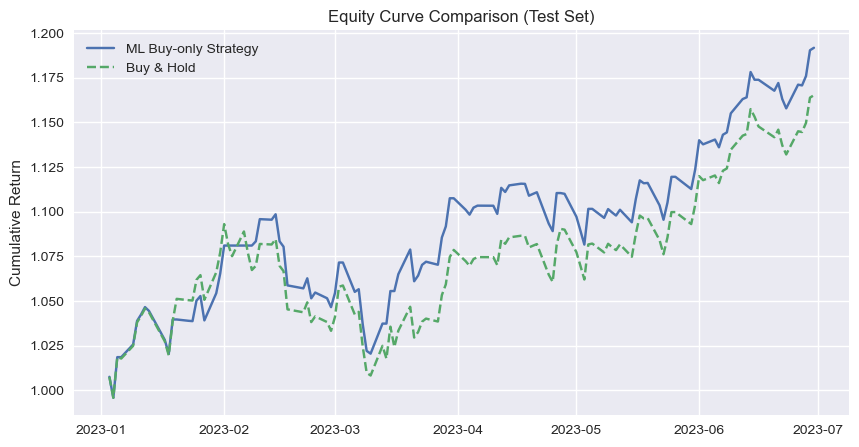

,Buy & Hold,ML Strategy
Total return,0.165122,0.191668
Sharpe,2.220126,2.662210


In [25]:
# Predict direction on test set
y_test_pred = best_model.predict(X_test)

# True next-day returns (already in your dataframe)
test_returns = test_df["target_return_1d"]

# Buy-only strategy: invest only when model predicts up
strategy_returns = test_returns * y_test_pred

# Buy & Hold benchmark
buy_hold_returns = test_returns.copy()

strategy_equity = (1 + strategy_returns).cumprod()
benchmark_equity = (1 + buy_hold_returns).cumprod()

plt.figure(figsize=(10, 5))
plt.plot(strategy_equity.index, strategy_equity, label="ML Buy-only Strategy")
plt.plot(benchmark_equity.index, benchmark_equity, label="Buy & Hold", linestyle="--")
plt.title("Equity Curve Comparison (Test Set)")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

def sharpe_ratio(returns, eps=1e-8):
    return returns.mean() / (returns.std() + eps) * np.sqrt(252)

summary = pd.DataFrame({
    "Buy & Hold": {
        "Total return": benchmark_equity.iloc[-1] - 1,
        "Sharpe": sharpe_ratio(buy_hold_returns)
    },
    "ML Strategy": {
        "Total return": strategy_equity.iloc[-1] - 1,
        "Sharpe": sharpe_ratio(strategy_returns)
    }
})

summary
